## Caso Práctico 

Cada día es más frecuente la introducción de la ciencia de datos en el ámbito del derecho y la justicia.
Un ejemplo bien conocido de ello es el sistema COMPAS (Correctional offender management profiling for
alternative sanctions) que se usa en varios estados de los Estados Unidos para hacer una evaluación del riesgo de
reincidencia de las personas detenidas.

Una breve descripción del sistema puede verse en la página https://en.wikipedia.org/wiki/COMPAS_(software).

En este caso, proporciona un conjunto de datos en bruto con información de las evaluaciones
(fichero compas-scores.csv) y la historia legal de unos 11 000 casos en los años 2013 y 2014
(se trata de uno de los ficheros originales utilizados en un análisis independiente del sistema
COMPAS llevado a cabo por ProPublica, disponible en internet).

Aunque el conjunto de datos contiene información adicional, para resolver las cuestiones planteadas en este caso
son necesarios (aparte de algunos campos cuyo nombre es autoexplicativo) los siguientes campos:

+ “compas_screening_date”: se refiere a la fecha en la que se realizó la evaluación

+ “decile_score”: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).

+ “v_decile_score”: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).

+ “is_recid”: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).

+ “r_offense_date”: fecha en la que se cometió el delito por el que se considera reincidente a la persona.

+ “is_violent_recid”: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para “is_recid” aplican aquí)".

+ “vr_offense_date”: fecha en la que se cometió el delito violento que da lugar a la consideración de reincidente.

## Se pide

### 1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# from sklearn import datasets # éste no hace falta

In [2]:
df = pd.read_csv('../input/compas-scores/compas-scores.csv')

Como dice el enunciado que solo se necesitan los campos

“compas_screening_date”: se refiere a la fecha en la que se realizó la evaluación

“decile_score”: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).

“v_decile_score”: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).

“is_recid”: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).

“r_offense_date”: fecha en la que se cometió el delito por el que se considera reincidente a la persona.

“is_violent_recid”: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para “is_recid” aplican aquí)".

“vr_offense_date”: fecha en la que se cometió el delito violento que da lugar a la consideración de reincidente.

así que eliminaremos el resto, salvo 'name', 'age', 'sex' y 'race', que nos servirán para identificar al individuo


También voy a mantener 'priors_count', que indica el número de detenciones previas, y después veremos que es
una variable útil para predecir el riesgo.

In [3]:
df_reducido = df[['name', 'age', 'sex', 'race', 'compas_screening_date', 'decile_score', 'v_decile_score', 'is_recid', 'r_offense_date', 'is_violent_recid', 'vr_offense_date', 'priors_count' 
 ]].copy()

vamos a echarle un vistazo por encima al dataframe:

In [4]:
df_reducido.head() # vemos que tiene pocas columnas: es más cómodo trabajar así

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaN,0,NaN,0
1,michael ryan,31,Male,Caucasian,2014-12-31,5,2,-1,NaN,0,NaN,0
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaN,4
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaN,0,NaN,1


In [5]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   11757 non-null  object
 1   age                    11757 non-null  int64 
 2   sex                    11757 non-null  object
 3   race                   11757 non-null  object
 4   compas_screening_date  11757 non-null  object
 5   decile_score           11757 non-null  int64 
 6   v_decile_score         11757 non-null  int64 
 7   is_recid               11757 non-null  int64 
 8   r_offense_date         3703 non-null   object
 9   is_violent_recid       11757 non-null  int64 
 10  vr_offense_date        882 non-null    object
 11  priors_count           11757 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [6]:
df_reducido.nunique()

name                     11584
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     3
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

# Análisis:
 


Vamos a echarle un vistazo más despacito a las cosas que llaman la atención. La primera es que 'is_recid' tome TRES valores 0, 1 y -1. El 0 supongo que significa que no es reincidente y el 1 que sí lo es; pero el '-1' ¿qué significa? En la página 17 de esta publicación:
 
https://arxiv.org/pdf/1906.04711.pdf
 
se dice:
 
"Additionally, ProPublica also dropped 719 people who did not appear to have good data. ProPublica could not find case/arrest information on these people. ProPublica tagged these as “is_recid = -1” in the full dataset."
 
Es decir, 'is_recid = -1' significa que los datos de ese individuo son incompletos o poco fiables. Por esa razón, ProPublica
 
https://www.propublica.org
 
los excluye del análisis y nosotros vamos a hacer lo mismo



In [7]:
(df_reducido.is_recid == -1).value_counts() # contamos el número de elementos (len) donde df.is_recid == -1

False    11038
True       719
Name: is_recid, dtype: int64

In [8]:
# vemos que hay 719 que son -1, lo que coincide con lo que dice la publicación citada previamente
# vamos a eliminarlos

#df_reducido = df_reducido[df_reducido.is_recid != -1] # solo conservo los valores del dataframe para los 
# que 'is_recid' es distinto (!=) de -1

df_reducido.drop(df_reducido[df_reducido.is_recid == -1].index, inplace=True)

In [9]:
df_reducido.nunique() # para comprobar si lo ha hecho bien

name                     10902
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     2
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

In [10]:
'''
lo siguiente es comprobar si los valores 'NaT' que aparecen en 'r_offense_date' 'vr_offense_date' se corresponden
realmente con 'no reincidentes'. Es decir, cada vez que aparezca un 'NaT', 'is_recid' o 'is_violent_recid' 
(el que corresponda) deben ser cero 

Para ello miro los elementos 'únicos' que tiene 'is_recid' cuando 'r_offense_date' es 'NaT', lo que para Python
es un valor 'null'
'''

df_reducido.is_recid[df_reducido.r_offense_date.isnull()].unique()

array([0])

In [11]:
# vemos que 'is_recid' es siempre cero, lo que confirma la hipótesis. Hacemos lo mismo para 'is_violent_recid'

df_reducido.is_violent_recid[df_reducido.vr_offense_date.isnull()].unique()


array([0])

In [12]:
# Perfecto. Parece que los datos no tienen inconsistencias.

# Vamos de todas formas a echarles un nuevo vistazo

df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   11038 non-null  object
 1   age                    11038 non-null  int64 
 2   sex                    11038 non-null  object
 3   race                   11038 non-null  object
 4   compas_screening_date  11038 non-null  object
 5   decile_score           11038 non-null  int64 
 6   v_decile_score         11038 non-null  int64 
 7   is_recid               11038 non-null  int64 
 8   r_offense_date         3703 non-null   object
 9   is_violent_recid       11038 non-null  int64 
 10  vr_offense_date        882 non-null    object
 11  priors_count           11038 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [13]:
df_reducido.nunique()

name                     10902
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     2
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

In [14]:
# el dataframe tiene 11038 filas; pero solo hay 10902 nombres distintos. Esto quiere decir que hay nombres 
# repetidos. A priori, no tiene nada de extraño. No obstante, pudiera ocurrir que algunas de esas personas
# sean, en realidad, la misma. Vamos a echarle un vistazo al tema

df_reducido[df_reducido.duplicated(['name', 'age'], keep=False)].sort_values(by = 'name')

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
7707,jeffrey williams,28,Male,African-American,2013-04-16,6,6,0,NaN,0,NaN,6
10164,jeffrey williams,28,Male,African-American,2014-06-25,2,2,1,2014-09-19,0,NaN,5
1004,john brown,65,Male,African-American,2014-04-11,2,1,1,2015-09-04,1,2015-09-04,2
11713,john brown,65,Male,African-American,2013-09-23,1,1,0,NaN,0,NaN,1
949,michael williams,23,Male,African-American,2013-05-24,10,8,0,NaN,0,NaN,4
10537,michael williams,23,Male,African-American,2013-01-26,6,6,0,NaN,0,NaN,1
3491,roderick thomas,23,Male,African-American,2014-03-10,7,5,0,NaN,0,NaN,3
7476,roderick thomas,23,Male,African-American,2013-02-12,8,5,0,NaN,0,NaN,1
112,troy smith,22,Male,African-American,2013-08-25,3,3,1,2014-10-06,0,NaN,1
2022,troy smith,22,Male,African-American,2013-03-22,7,6,0,NaN,0,NaN,4


In [15]:
# el dataframe tiene 11038 filas; pero solo hay 10902 nombres distintos. Esto quiere decir que hay nombres 
# repetidos. A priori, no tiene nada de extraño. No obstante, pudiera ocurrir que algunas de esas personas
# sean, en realidad, la misma. Vamos a echarle un vistazo al tema

df_reducido[df_reducido.duplicated(['name', 'age'], keep=False)].sort_values(by = 'name')

# Vemos como resultado que solo hay 5 personas con el mismo nombre y edad. Podríamos mirar si 
# coincide la fecha de nacimiento en el dataframe original para afinar más; pero creo que no merece la pena
# hacer nada: solo cinco posibles duplicados de 11038 registros no van a tener incidencia en los resultados
# del análisis. Opto por no hacer nada con ellos.

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
7707,jeffrey williams,28,Male,African-American,2013-04-16,6,6,0,NaN,0,NaN,6
10164,jeffrey williams,28,Male,African-American,2014-06-25,2,2,1,2014-09-19,0,NaN,5
1004,john brown,65,Male,African-American,2014-04-11,2,1,1,2015-09-04,1,2015-09-04,2
11713,john brown,65,Male,African-American,2013-09-23,1,1,0,NaN,0,NaN,1
949,michael williams,23,Male,African-American,2013-05-24,10,8,0,NaN,0,NaN,4
10537,michael williams,23,Male,African-American,2013-01-26,6,6,0,NaN,0,NaN,1
3491,roderick thomas,23,Male,African-American,2014-03-10,7,5,0,NaN,0,NaN,3
7476,roderick thomas,23,Male,African-American,2013-02-12,8,5,0,NaN,0,NaN,1
112,troy smith,22,Male,African-American,2013-08-25,3,3,1,2014-10-06,0,NaN,1
2022,troy smith,22,Male,African-American,2013-03-22,7,6,0,NaN,0,NaN,4


In [16]:
# Finalmente, llevamos a cabo la conversión de tipos

# Vemos que 'age', 'decile_score' y 'v_decile_score' se tratan como 'int64', es decir, como números. Esto es razonable. 
# 
# 'name' es 'object'. Esta categoría, aunque correcta, es demasiado general (una especie de cajón de sastre en el que cabe todo). Vamos a convertirla en 'string' (texto)
# 
# Vemos que 'sex', 'race', 'is_recid' y 'is_violent_recid' son 'objects' también. Sin embargo, es razonable  convertirlas en 'category' (de hecho, he observado que al ejecutar este programa con otra versión de pandas se convierten a 'category' de forma automática). Llama la atención que 'is_violent_recid' toma dos valores: es reincidente o no lo es. Sin embargo, 'is_recid' toma TRES: después volveremos sobre esto 
# 
# 'compas_screening_date', 'r_offense_date' y 'vr_offense_date' también son 'objects'. Tenemos que decirle a Python que, en realidad, se trata de fechas ('datetime')
# 
# Finalmente, vemos también que solo 'r_offense_date' y 'vr_offense_date' tienen valores 'null'. De hecho, a simple vista se aprecia que hay muchos 'NaN'. Esto tiene sentido: si la persona NO es reincidente, 'r_offense_date' y 'vr_offense_date' deben estar vacíos. Hay que comprobar que esto es así
# 
# Hagamos todo eso:
# 


# conversión de tipos
df_reducido['name'] = df_reducido['name'].astype('string')
df_reducido['sex'] = df_reducido['sex'].astype('category')
df_reducido['race'] = df_reducido['race'].astype('category')
df_reducido['is_recid'] = df_reducido['is_recid'].astype('category')
#df_reducido['is_violent_recid'] = df_reducido['is_violent_recid'].astype('category')
df_reducido['compas_screening_date'] = pd.to_datetime(df_reducido['compas_screening_date'])
df_reducido['r_offense_date'] = pd.to_datetime(df_reducido['r_offense_date'])
df_reducido['vr_offense_date'] = pd.to_datetime(df_reducido['vr_offense_date'])

In [17]:
# veamos si lo ha hecho bien
df_reducido.info()
df_reducido.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   11038 non-null  string        
 1   age                    11038 non-null  int64         
 2   sex                    11038 non-null  category      
 3   race                   11038 non-null  category      
 4   compas_screening_date  11038 non-null  datetime64[ns]
 5   decile_score           11038 non-null  int64         
 6   v_decile_score         11038 non-null  int64         
 7   is_recid               11038 non-null  category      
 8   r_offense_date         3703 non-null   datetime64[ns]
 9   is_violent_recid       11038 non-null  int64         
 10  vr_offense_date        882 non-null    datetime64[ns]
 11  priors_count           11038 non-null  int64         
dtypes: category(3), datetime64[ns](3), int64(5), string(1)
memor

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaT,0,NaT,0
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaT,4
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaT,0,NaT,1
5,bouthy pierrelouis,43,Male,Other,2013-03-26,1,1,0,NaT,0,NaT,2


In [18]:
# Con esto acabamos el pre-procesado

### 2. ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

Las estimaciones de riesgo están en 'decile_score' y 'v_decile_score'. A mayor riesgo, mayor valor. Lo que nos preguntan es si conociendo cuánto valen 'is_recid'/'is_violent_recid' podemos predecir el valor que tomarán 'decile_score' y 'v_decile_score'. A priori, la hipótesis es que NO: si el sujeto NO es reincidente ('is_recid'/'is_violent_recid' = 0), cabe esperar que el riesgo sea bajo; sin embargo, cuando tenemos un reincidente ('is_recid'/'is_violent_recid' = 1), supongo que el riesgo puede ser cualquiera y no podemos anticiparlo. Vamos a comprobar si esta intuición es o no correcta

In [19]:
# Para ver que 'is_recid' predice más bien poco, vamos a hacer una tabla de contingencia en la que comprobaremos 
# si hay coincidencias de is_recid = 1 con decile_score >= 7:

cm = pd.crosstab(df_reducido.is_recid==1, df_reducido.decile_score>=7, rownames=['prediccion'], colnames=['real'])
cm

real,False,True
prediccion,,
False,5877,1458
True,2200,1503


In [20]:
'''
cm resulta ser igual a

real        False  True 
prediccion              
False        5877   1458
True         2200   1503

Esto quiere decir que hay 5877 + 2200 = 8077 individuos con decile_score < 7 (no peligrosos) y 1458 + 1503 = 2961 con decile_score >= 7.  

De los 8077 'no peligrosos', solo 5877 tienen 'is_recid'= 0. Los 2200 restantes tienen 'is_recid' = 1. Es decir, si nos fijamos 
únicamente en 'is_recid' estaríamos diciendo erróneamente que esos 2200 individuos son peligrosos y necesitan medidas de control. 
Es decir, tenemos 2200 falsos positivos.

De los 2961 'peligrosos', 1458 tienen 'is_recid' = 0. Por ello, si de nuevo nos fijamos únicamente en 'is_recid' 
resultaría que estaríamos dejando ninguna supervisión a esos 1458 individuos.

Nuestra tasa de acierto, en definitiva, es:
    (5877 + 1503)/(5877 + 1503 + 2200 + 1458) = 0.67
Es decir, si clasificamos como 'peligrosos' a los que tienen 'is_recid' = 1,  acertamos un 67 % de las veces.
'''
# Vamos a ver si mejoramos esto con un modelo de regresion. 
# Es decir, vamos a intentar predecir 'decile_score'
# como una suma ponderada de priors_count, sex, race, is_recid y is_violent_recid

from statsmodels.formula.api import ols

#df_reducido = df_reducido[(df_reducido.is_recid == 1) & (df_reducido.decile_score >=  7)]

In [21]:
fit_decile_score = ols('decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) + C(is_violent_recid)', data=df_reducido).fit() 

# hemos de escribir C() si la variable es categórica

print(fit_decile_score.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_score   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     790.0
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:01:19   Log-Likelihood:                -24346.
No. Observations:               11038   AIC:                         4.871e+04
Df Residuals:                   11027   BIC:                         4.879e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [22]:
'''
Lo importante es:

R-squared: cuanto más cercano a 1, mejor es el modelo. Nos ha salido 0.417. No es para tirar cohetes, pero tampoco está mal del todo.
coef: son los coeficientes A, B, C, ... En concreto, está diciendo que
prediccion_decile_score = 0.2632 * priors_counts -0.0756 * male -1.2429  * asian -0.6781  caucasian + ... + 0.4953  * is_recid + ... + 7.1746 

donde male, asian, caucasian, ... son variables que valen 1 o 0 y codifican el sexo, la raza, etc. 
'''

# P > |t| : es una medida de la importancia que el modelo concede a la variable asociada. Cuanto mayor sea, peor. 
# En este caso se ve que, para el modelo, 'male' y 'native american' son poco relevantes. 
# Que el sexo ('male') cuenta poco ya se ve en que su coeficiente (-0.0756) es muy pequeño. Que 'native american' 
# también sea poco importante se debe a que hay muy poca gente de esa raza en la base de datos: solo hay 36, 
# como se calcula con el siguiente comando

(df_reducido.race=='Native American').sum()

36

In [23]:
# La explicación detallada de cómo funciona statsmodel está aquí:
# https://www.efavdb.com/interpret-linear-regression

### 3. El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante. Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

In [24]:
# con este comando se hace una predicción del valor de decile_score a partir de los que hemos indicado antes.
prediccion = fit_decile_score.predict(df_reducido) 

In [25]:
# generamos la tabla de contingencia, comparando los casos en los que se predice 
# un valor mayor que 7, con aquellos en los que realmente es mayor que 7
cm = pd.crosstab(prediccion>=7, df_reducido.decile_score>=7, rownames=['prediccion'], colnames=['real'])
cm

real,False,True
prediccion,,
False,7931,2306
True,146,655


In [26]:
'''
real        False  True 
prediccion              
False        7931   2306
True          146    655

Quiere decir que en 7931 casos hemos predicho que decile_score era menor que 7
y, efectivamente, se ha cumplido (verdaderos negativos). En 2306 pensábamos que sería 
menor que 7 pero hemos fallado en la predicción (falsos negativos).

Por otra parte, en 655 casos hemos dicho que decile_score sería mayor que 7 y 
hemos acertado (verdaderos positivos).  

En resumen, tenemos:
    7931 verdaderos negativos (True negatives o TN)
    655 verdaderos positivos (TP)
    2306 falsos negativos (False neg. o FN)
    146 falsos positivos (FP)
'''

TN = cm[False][False]   
TP = cm[True][True]
FN = cm[True][False]
FP = cm[False][True]

print('Accuracy: ', (TN+TP)/(TN+TP+FN+FP))
print('PPV: ', TP / (TP + FP))
print('FPR: ', FP / (FP + TN))
print('FNR: ', FN / (FN + TP))
print()

Accuracy:  0.777858307664432
PPV:  0.8177278401997503
FPR:  0.018076018323635014
FNR:  0.7787909490037149



In [27]:
from sklearn.metrics import classification_report

print(classification_report(df_reducido.decile_score>=7, prediccion>=7))


              precision    recall  f1-score   support

       False       0.77      0.98      0.87      8077
        True       0.82      0.22      0.35      2961

    accuracy                           0.78     11038
   macro avg       0.80      0.60      0.61     11038
weighted avg       0.79      0.78      0.73     11038



In [28]:
# Estos números básicamente coinciden con lo ya calculado

# precision True = PPV = 0.82
# recall False = TN / (TN + FP) = 1 - FPR = 0.98
# precision False = TN / (TN + FN) = 0.74
# recall True = FP / (TP + FP) =  1 - TP / (TP + FP) = 0.2

### 4. El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no. Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.

In [29]:
#Se eliminan valores -1 de decile_score y v_decile_score para graficar
df_reducido = df_reducido.drop(df_reducido[df_reducido['v_decile_score']==-1].index)
df_reducido = df_reducido.drop(df_reducido[df_reducido['decile_score']==-1].index)

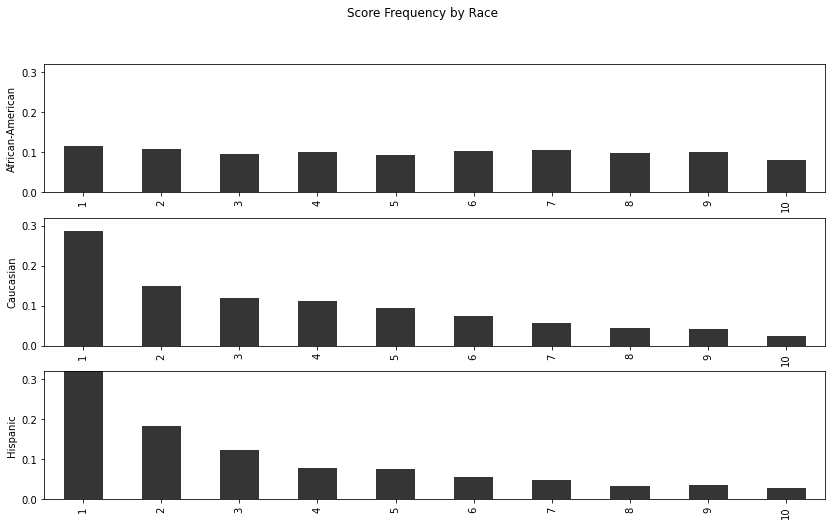

In [30]:
import matplotlib.pyplot as plt

#RACE
dfgb = df_reducido.groupby("race")
race_count = df_reducido.groupby("race")["name"].count()

fig, ax = plt.subplots(3, figsize=(14, 8))

for (i, race) in enumerate(["African-American", "Caucasian", "Hispanic"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("")
   
    ax[i].set_ylim(0, 0.32)

fig.suptitle("Score Frequency by Race")
plt.show()

In [31]:
# Como se puede ver en el gráfico, la distribucion en el decile score de las personas de raza negra se encuentra 
# uniformemente distribuida del 1 al 10, Mientras que para las demas razas, la gran mayoría de los casos se encuentran 
# en los valores mas bajos del decile_score.

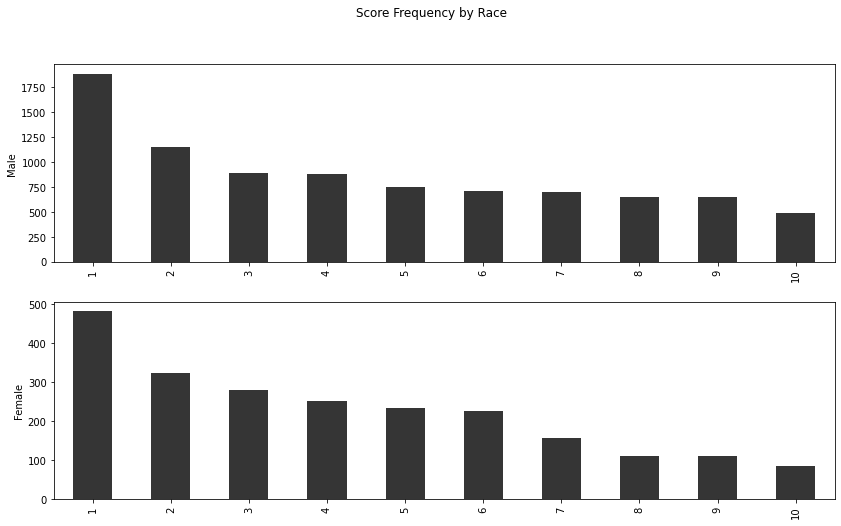

In [32]:
#Sex
dfgb = df_reducido.groupby("sex")
race_count = df_reducido.groupby("sex")["name"].count()

fig, ax = plt.subplots(2, figsize=(14, 8))

for (i, sex) in enumerate(["Male", "Female"]):
    (
        (dfgb
            .get_group(sex)
            .groupby("decile_score")["name"].count() 
         #/ race_count[race]
        )
        .plot(kind="bar", ax=ax[i], color="#353535")
    )
    ax[i].set_ylabel(sex)
    ax[i].set_xlabel("")
   
 #   ax[i].set_ylim(0, 0.)

fig.suptitle("Score Frequency by Race")
plt.show()

In [33]:
# Para el caso de las diferencias para hombres y mujeres se puede observar en la gráfica una tendencia
# a que menos mujeres estan en lo mas alto del decile_score a diferencia de los hombres.

### 5. ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

In [34]:
# repetimos lo que hemos hecho antes para decile_score pero para v_decile_score 

fit_v_decile_score = ols('v_decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) + C(is_violent_recid)', data=df_reducido).fit() 

# hemos de escribir C() si la variable es categórica

print(fit_v_decile_score.summary())

                            OLS Regression Results                            
Dep. Variable:         v_decile_score   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     885.9
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:                -22513.
No. Observations:               11027   AIC:                         4.505e+04
Df Residuals:                   11016   BIC:                         4.513e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [35]:
vprediccion = fit_v_decile_score.predict(df_reducido)
# con este comando se hace una predicción del valor de decile_score a partir de los que hemos indicado antes.

# generamos la tabla de contingencia, comparando los casos en los que se predice 
# un valor mayor que 7, con aquellos en los que realmente es mayor que 7
cm = pd.crosstab(vprediccion>=7, df_reducido.v_decile_score>=7, rownames=['prediccion'], colnames=['real'])

TN = cm[False][False]   
TP = cm[True][True]
FN = cm[True][False]
FP = cm[False][True]

print('Accuracy: ', (TN+TP)/(TN+TP+FN+FP))
print('PPV: ', TP / (TP + FP))
print('FPR: ', FP / (FP + TN))
print('FNR: ', FN / (FN + TP))
print()

Accuracy:  0.8471932529246395
PPV:  0.6949152542372882
FPR:  0.0019315377186393389
FNR:  0.9759953161592506



In [36]:
# la precisión (accuracy) es ahora del 84.7 %, mejor la que se consigue para los delitos generales

from sklearn.metrics import classification_report

print(classification_report(df_reducido.v_decile_score>=7, vprediccion>=7))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      9319
        True       0.69      0.02      0.05      1708

    accuracy                           0.85     11027
   macro avg       0.77      0.51      0.48     11027
weighted avg       0.82      0.85      0.78     11027

